## Análise de videos do Youtube
Fonte:
https://www.kaggle.com/datasnaek/youtube-new

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [7]:
os.path.abspath(os.path.dirname('CAvideos.csv'))

'/Users/brunoozaki/Desktop/Data projects'

In [8]:
data= pd.read_csv("/Users/brunoozaki/Desktop/Data projects/youtube data/CAvideos.csv")

In [9]:
data.drop('video_id',axis=1, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           40881 non-null  object
 1   title                   40881 non-null  object
 2   channel_title           40881 non-null  object
 3   category_id             40881 non-null  int64 
 4   publish_time            40881 non-null  object
 5   tags                    40881 non-null  object
 6   views                   40881 non-null  int64 
 7   likes                   40881 non-null  int64 
 8   dislikes                40881 non-null  int64 
 9   comment_count           40881 non-null  int64 
 10  thumbnail_link          40881 non-null  object
 11  comments_disabled       40881 non-null  bool  
 12  ratings_disabled        40881 non-null  bool  
 13  video_error_or_removed  40881 non-null  bool  
 14  description             39585 non-null  object
dtypes:

In [11]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


In [12]:
data.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [13]:
data.tail()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40876,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...
40880,18.14.06,【完整版】遇到恐怖情人該怎麼辦？2018.06.13小明星大跟班,我愛小明星大跟班,24,2018-06-13T16:00:03.000Z,"吳宗憲|""吳姍儒""|""小明星大跟班""|""Sandy""|""Jacky wu""|""憲哥""|""中天...",107392,300,62,251,https://i.ytimg.com/vi/POTgw38-m58/default.jpg,False,False,False,藝人：李妍瑾、玉兔、班傑、LaLa、小優、少少專家：陳筱屏(律師)、Wendy(心理師)、羅...


In [14]:
data.set_index('title',inplace=True)

In [15]:
data.reset_index()

,title,trending_date,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Eminem - Walk On Water (Audio) ft. Beyoncé,17.14.11,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,PLUSH - Bad Unboxing Fan Mail,17.14.11,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",17.14.11,Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,I Dare You: GOING BALD!?,17.14.11,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,Ed Sheeran - Perfect (Official Music Video),17.14.11,Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,HOW2: How to Solve a Mystery,18.14.06,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,Eli Lik Lik Episode 13 Partie 01,18.14.06,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,18.14.06,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,Trump Advisor Grovels To Trudeau,18.14.06,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


In [16]:
data.sort_values('views',ascending=False)

,trending_date,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
title,,,,,,,,,,,,,,
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,17.13.12,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014479,1602383,817582,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,17.12.12,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125431369,2912715,1545018,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,17.11.12,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811217,1470387,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,17.10.12,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656678,1353655,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
Childish Gambino - This Is America (Official Video),18.13.05,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",98938809,3037318,161813,319502,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
018 Algebra Lineal 18-10-2011,17.16.11,udearroba,27,2017-11-15T18:20:06.000Z,[none],1141,0,0,0,https://i.ytimg.com/vi/0ayARJdf7I4/default.jpg,False,False,False,Base ortogonal
Simon Olivier Fecteau créateur des derniers Bye Bye pour sa série ''En audition avec Simon'' à TLMEP,18.26.02,mart lat,24,2018-02-26T03:18:13.000Z,"Simon Olivier Fecteau|""Bye bye""|""En audition a...",1107,14,1,3,https://i.ytimg.com/vi/MTtFpn9C7Q4/default.jpg,False,False,False,Simon Olivier Fecteau renoue avec son ingrat p...
"Raptors Post-Game: DeMar DeRozan - February 13, 2018",18.14.02,Toronto Raptors,17,2018-02-14T03:32:57.000Z,"NBA|""Toronto""|""Toronto Raptors""|""Raptors""|""Bas...",1023,65,5,23,https://i.ytimg.com/vi/CGv_PLrWArs/default.jpg,False,False,False,DeMar DeRozan addresses the media following To...


In [17]:
data.reset_index(inplace=True)

In [18]:
top10channels= data.groupby('channel_title').sum().sort_values('views',ascending=False).head(10).reset_index()

In [19]:
top10channels

,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,Marvel Entertainment,892,1011420205,32892782,606296,4123846,2.0,0.0,0.0
1,T-Series,810,799114025,15856204,1067612,1144248,0.0,0.0,0.0
2,Dude Perfect,1190,729916338,28298398,590686,2096231,0.0,0.0,0.0
3,YouTube Spotlight,312,635976769,16879595,8898520,5406288,0.0,0.0,0.0
4,ibighit,190,511567918,50259874,912931,9156753,0.0,0.0,0.0
5,PewDiePie,2547,461700524,33596931,902236,3869088,0.0,0.0,1.0
6,Sony Pictures Entertainment,792,451188760,10688878,482395,1245147,0.0,0.0,0.0
7,Speed Records,1150,426604974,12238591,574980,828275,0.0,0.0,0.0
8,20th Century Fox,47,419577035,9002249,195772,557220,0.0,0.0,0.0
9,ChildishGambinoVEVO,80,411775069,14593916,689948,1545142,0.0,0.0,0.0


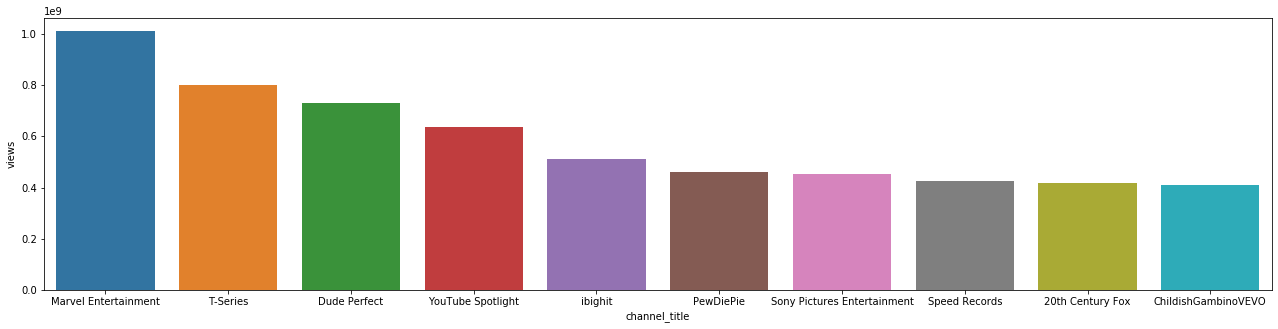

In [20]:
plt.figure(figsize=(22,5))
sns.barplot(data=top10channels,y='views',x='channel_title')

In [21]:
marvel=data[data['channel_title']=='Marvel Entertainment']

In [22]:
marvel.head().sort_values('views',ascending=False).reset_index(inplace=True)

In [23]:
marveltop10=marvel.sort_values('views',ascending=False).reset_index().head(30)

In [24]:
marveltop10

,index,title,trending_date,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,4699,Marvel Studios' Avengers: Infinity War Officia...,17.07.12,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",89930713,2606665,53011,347982,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
1,4451,Marvel Studios' Avengers: Infinity War Officia...,17.06.12,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",87450245,2584675,52176,341571,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
2,4202,Marvel Studios' Avengers: Infinity War Officia...,17.05.12,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",84281319,2555414,51008,339708,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
3,3998,Marvel Studios' Avengers: Infinity War Officia...,17.04.12,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",80360459,2513103,49170,335920,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4,3798,Marvel Studios' Avengers: Infinity War Officia...,17.03.12,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",74789251,2444960,46172,330710,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
5,3598,Marvel Studios' Avengers: Infinity War Officia...,17.02.12,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",66637636,2331359,41154,316185,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
6,3398,Marvel Studios' Avengers: Infinity War Officia...,17.01.12,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",56367282,2157741,34078,303178,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
7,25400,Marvel Studios' Avengers: Infinity War - Offic...,18.23.03,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",46707200,1513428,30566,188160,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...
8,25145,Marvel Studios' Avengers: Infinity War - Offic...,18.22.03,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",45064699,1494997,29812,186005,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...
9,24926,Marvel Studios' Avengers: Infinity War - Offic...,18.21.03,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",42862117,1465001,28312,182514,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...


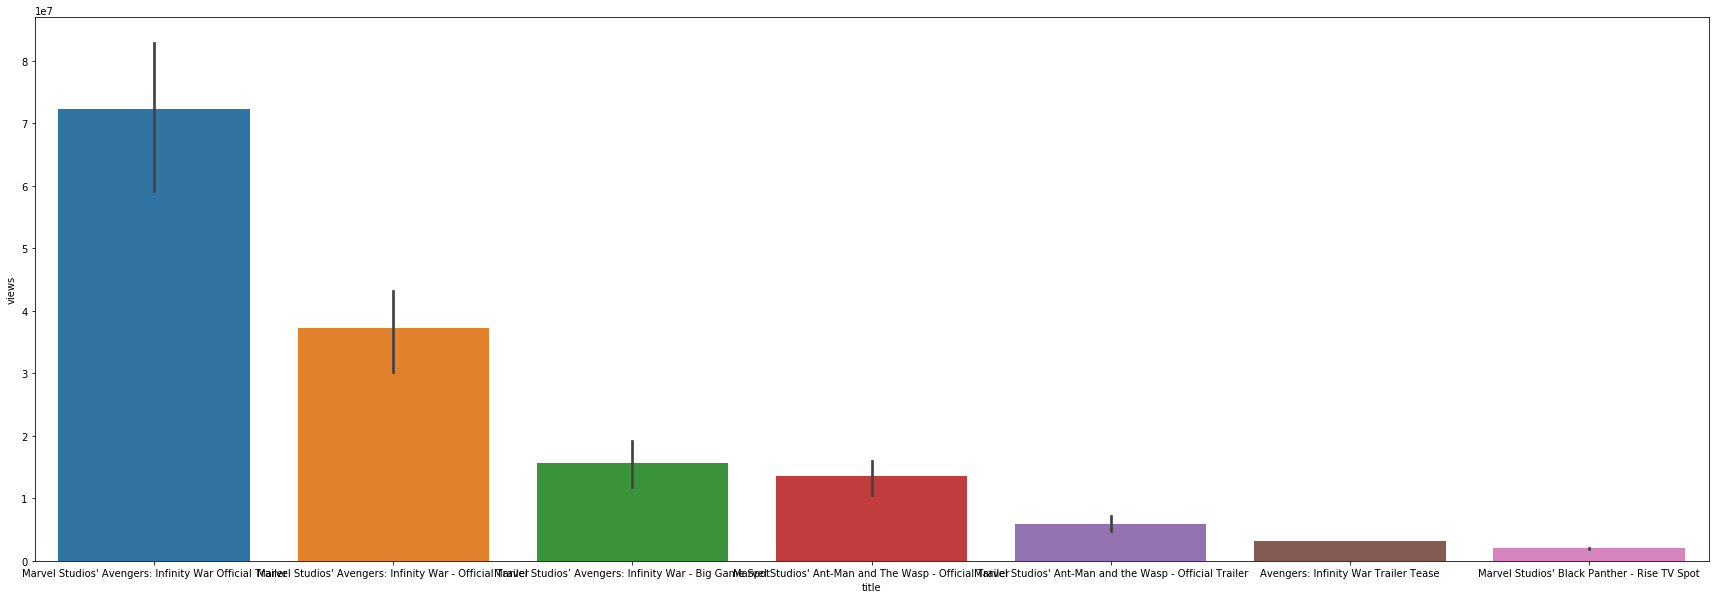

In [25]:
plt.figure(figsize=(30,10))
sns.barplot(data=marveltop10,x='title',y='views')

In [26]:
data.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.139610,-0.144363,-0.028731,-0.068848,0.038741,0.018377,-0.030002
views,-0.139610,1.000000,0.828964,0.557621,0.693107,0.004424,0.005745,0.001928
likes,-0.144363,0.828964,1.000000,0.460427,0.836585,-0.023057,-0.024729,0.001953
dislikes,-0.028731,0.557621,0.460427,1.000000,0.643494,-0.005282,-0.008762,0.000636
comment_count,-0.068848,0.693107,0.836585,0.643494,1.000000,-0.028109,-0.016602,0.003117
comments_disabled,0.038741,0.004424,-0.023057,-0.005282,-0.028109,1.000000,0.147903,-0.003092
ratings_disabled,0.018377,0.005745,-0.024729,-0.008762,-0.016602,0.147903,1.000000,-0.002131
video_error_or_removed,-0.030002,0.001928,0.001953,0.000636,0.003117,-0.003092,-0.002131,1.000000


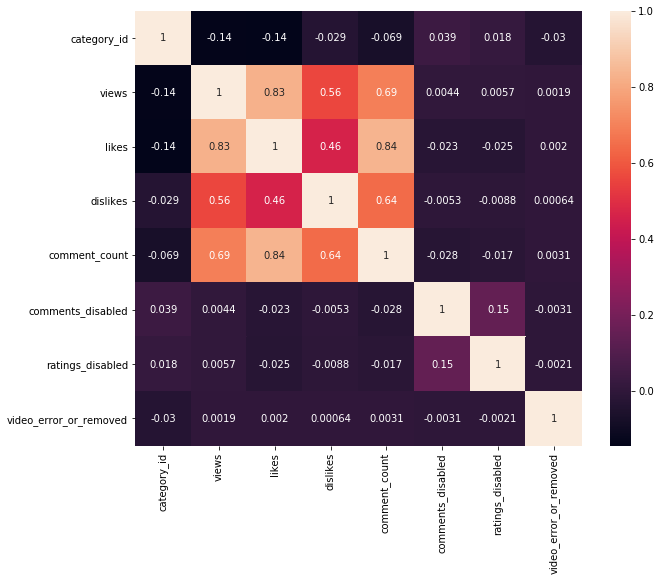

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

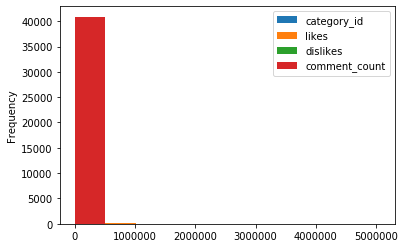

In [28]:
data.plot.hist(x='views')

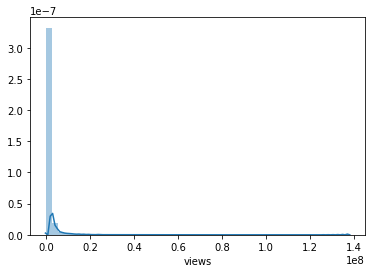

In [29]:
sns.distplot(data.views)

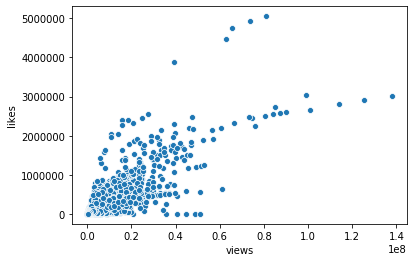

In [30]:
sns.scatterplot(x='views',y='likes',data=data)

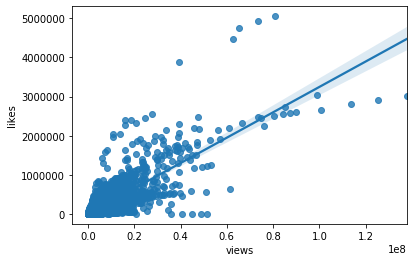

In [31]:
sns.regplot(x='views',y='likes',data=data)

### Regressão linear
A tentativa aqui é de tentar prever o número de likes a patir das views

In [32]:
y = data[['likes']]
X= data[['views']]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [37]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[0.0321958]]


In [39]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

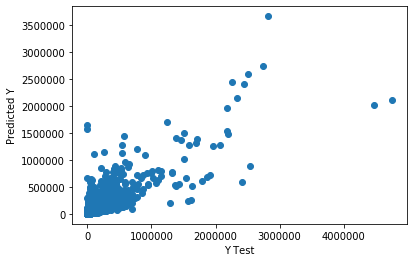

In [40]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [41]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 24319.97381205786
MSE: 6214476119.720982
RMSE: 78831.94859776703


In [42]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
views,0.032196


In [45]:
lm.predict([[20000000]])

array([[646458.11033404]])

In [46]:
dataus= pd.read_csv("/Users/brunoozaki/Desktop/Data projects/youtube data/USvideos.csv")

In [49]:
dataus.drop('video_id',axis=1,inplace=True)

In [57]:
dataus.set_index('title',inplace=True)

In [63]:
dataus.reset_index(inplace=True)

In [68]:
dataus.sort_values('views',ascending=False)

,title,trending_date,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38547,Childish Gambino - This Is America (Official V...,18.02.06,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
38345,Childish Gambino - This Is America (Official V...,18.01.06,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",220490543,4962403,338105,512337,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
38146,Childish Gambino - This Is America (Official V...,18.31.05,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",217750076,4934188,335462,509799,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37935,Childish Gambino - This Is America (Official V...,18.30.05,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",210338856,4836448,326902,501722,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37730,Childish Gambino - This Is America (Official V...,18.29.05,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",205643016,4776680,321493,496211,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,Coach Taggart Monday Presser Ahead of Arizona,17.16.11,GoDucksdotcom,17,2017-11-13T20:41:45.000Z,"Oregon|""Ducks""|""college athletics""|""college fo...",687,10,2,5,https://i.ytimg.com/vi/-JVITToppE0/default.jpg,False,False,False,Coach Taggart addresses the media ahead of the...
14531,Artwork Forge,18.27.01,Palo Alto Online,17,2018-01-10T23:53:56.000Z,[none],658,1,0,0,https://i.ytimg.com/vi/dQMZLXaa1L8/default.jpg,False,False,False,Artwork Forge II - an art installation created...
14782,"1 dead, others injured after Ky. school shooting",18.28.01,Newsy,25,2018-01-23T15:30:01.000Z,"shooting|""kentucky""|""breaking news""|""u.s. news...",559,9,0,4,https://i.ytimg.com/vi/y6KYFcta4SE/default.jpg,False,False,False,Kentucky Gov. Matt Bevin confirmed there was a...
14563,"1 dead, others injured after Ky. school shooting",18.27.01,Newsy,25,2018-01-23T15:30:01.000Z,"shooting|""kentucky""|""breaking news""|""u.s. news...",554,9,0,4,https://i.ytimg.com/vi/y6KYFcta4SE/default.jpg,False,False,False,Kentucky Gov. Matt Bevin confirmed there was a...


In [67]:
dataus.drop_duplicates(inplace=True)

In [69]:
top10channelsus= dataus.groupby('channel_title').sum().sort_values('views',ascending=False).head(10).reset_index()

In [72]:
top10channelsus

,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,ChildishGambinoVEVO,250,3758488765,96700818,6054434,10151289,0.0,0.0,0.0
1,ibighit,800,2235906679,199247121,3467306,31817464,0.0,0.0,0.0
2,Dude Perfect,2227,1870085178,60275557,1501477,4009163,0.0,0.0,0.0
3,Marvel Entertainment,2824,1808998971,55873344,1031250,6453560,0.0,0.0,0.0
4,ArianaGrandeVevo,430,1576959172,52170970,1931230,4295333,0.0,0.0,0.0
5,MalumaVEVO,320,1551515831,23278380,1757948,1227634,0.0,0.0,0.0
6,jypentertainment,640,1486972132,44900910,2482131,7575510,0.0,0.0,0.0
7,Sony Pictures Entertainment,2112,1432374398,30106808,1414686,3533551,0.0,0.0,0.0
8,FoxStarHindi,768,1238609854,23762509,910745,1782776,0.0,0.0,0.0
9,BeckyGVEVO,200,1182971286,19185287,1616616,1176862,0.0,0.0,0.0
